In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fmin_tnc
from copy import deepcopy

In [24]:
df = pd.read_csv('athlete_events.csv', delimiter=',') 
# filter by sport - basketball
df = df.loc[(df['Sport'] == "Basketball")]
df = df.dropna()

In [25]:
female_players = df.loc[(df['Sex'] == "F")]
male_players = df.loc[(df['Sex'] == "M")]

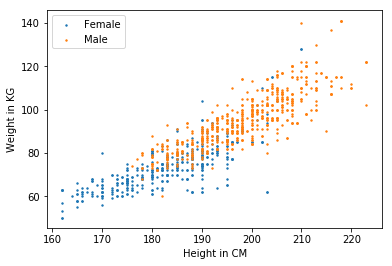

In [26]:
plt.scatter(female_players['Height'], female_players['Weight'], s=2, label='Female')
plt.scatter(male_players['Height'], male_players['Weight'], s=2, label='Male')
plt.legend()
plt.ylabel("Weight in KG")
plt.xlabel("Height in CM")
plt.show()

In [27]:
def dist(a, b, ax=1):
    # Euclidean Distance Caculator
    return np.linalg.norm(a - b, axis=ax)

In [28]:
# Number of clusters
k = 2
f1 = df['Height'].astype(float)
f2 = df['Weight'].astype(float)
# merging two columns into np array
X = np.array(list(zip(f1, f2)))

In [29]:
C_X = np.random.randint(np.min(f1), np.max(f1), size=k)
C_Y = np.random.randint(np.min(f2), np.max(f2), size=k)
C = np.array(list(zip(C_X, C_Y)), dtype=np.float32)


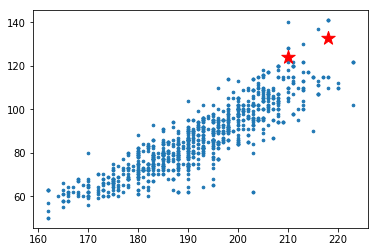

In [30]:
plt.scatter(f1, f2, s=7)
plt.scatter(C_X, C_Y, marker='*', s=200, c='r')


In [31]:
# Array for storing old values of centroids
C_old = np.zeros(C.shape)

In [32]:
clusters = np.zeros(len(X))
# Counting distance between new centroids and old centroids
error = dist(C, C_old, None)
# Looping till there is no error (no distance between C and C_old)
while error != 0:
    # Assigning each value to its closest cluster
    for i in range(len(X)):
        # caluclating distance between current point in array X and Centroid
        distances = dist(X[i], C)
        # returning min value index of distances array
        cluster = np.argmin(distances)
        clusters[i] = cluster
    # Storing the old centroid values
    C_old = deepcopy(C)
    # Finding the new centroids by taking the average value
    for i in range(k):
        points = [X[j] for j in range(len(X)) if clusters[j] == i]
        C[i] = np.mean(points, axis=0)
    error = dist(C, C_old, None)

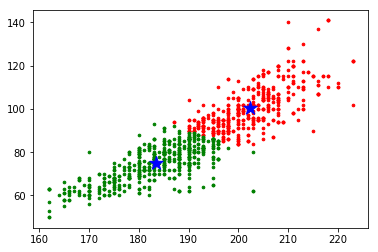

In [33]:
# Ploting clustered results
colors = ['r', 'g']
fig, ax = plt.subplots()
for i in range(k):
    points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
    ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])
ax.scatter(C[:, 0], C[:, 1], marker='*', s=200, c='blue')

In [34]:
# Our centroids
C

array([[202.28572, 100.35931],
       [183.45168,  74.95539]], dtype=float32)

In [ ]:
# Lets compare our centroids with the ones calculated by sklearn
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=k).fit(X)
labels = kmeans.predict(X)
skl_centroids = kmeans.cluster_centers_

In [ ]:
skl_centroids

In [ ]:
# As we can see centroids calculted from scratch
# are more or less the same as the ones from sklearn lib.